In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

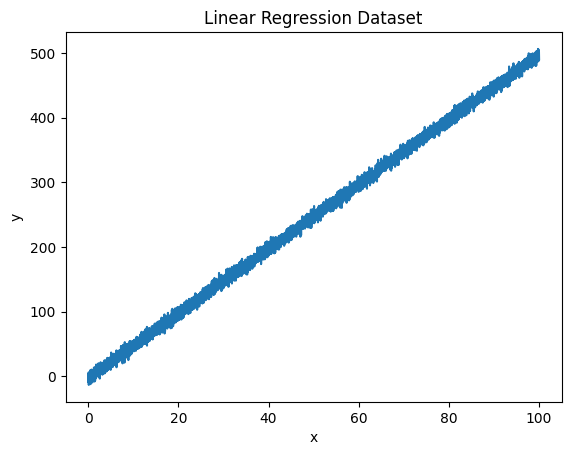

In [4]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [5]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [6]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [7]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], task='regression', learning_rate=1e-5, n_epochs=3000, print_cost=True)

Cost after iteration 0: 1.7540509479404216
Cost after iteration 1000: 0.03458781019012258
Cost after iteration 2000: 0.032509206191058765
Cost after iteration 2999: 0.031709746270796736


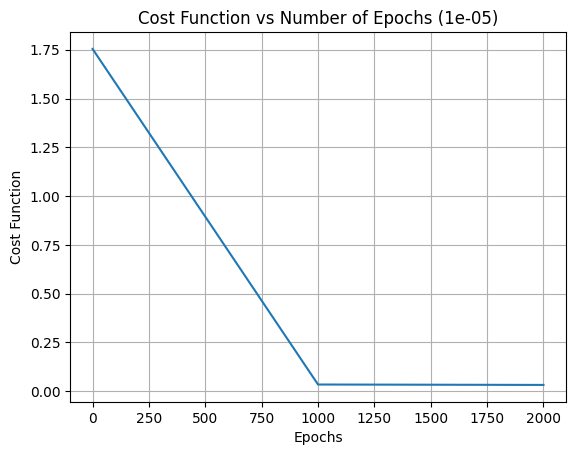

In [8]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [9]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.03170921390667989


In [10]:
pred = model.predict(test_x, test_y)

RMSE: 0.04455498345979135


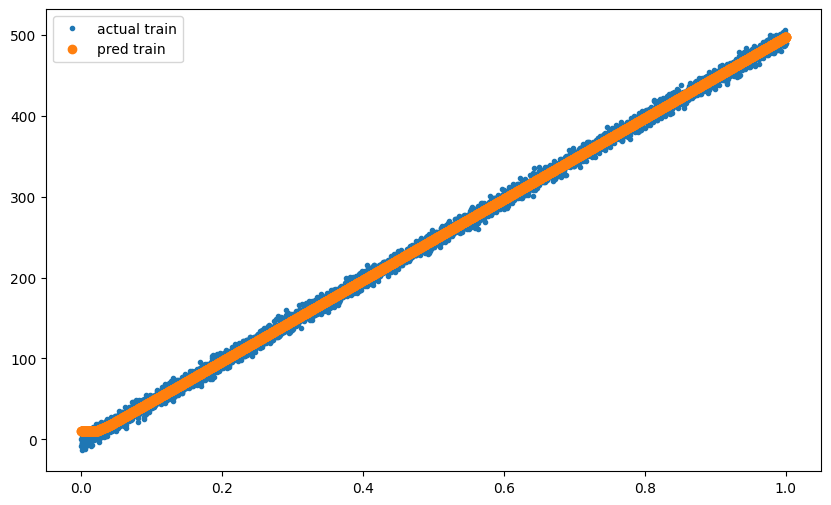

In [11]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

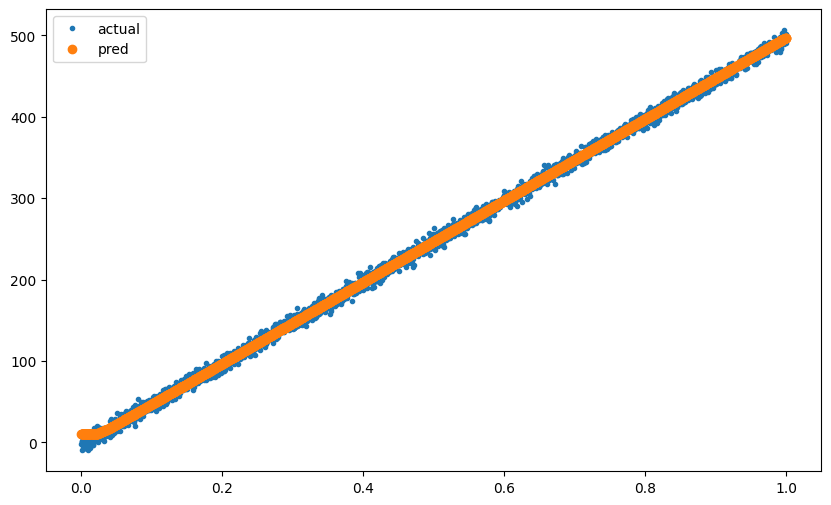

In [12]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

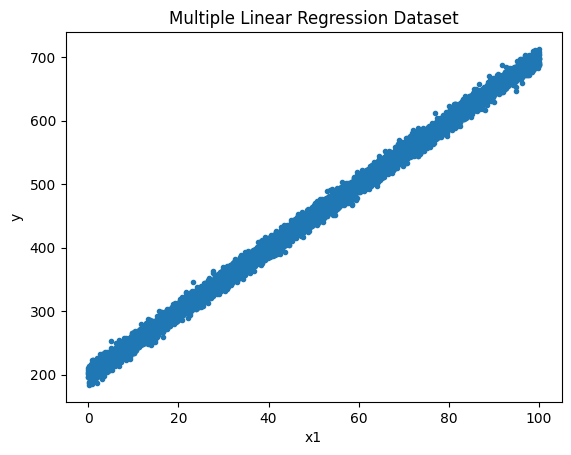

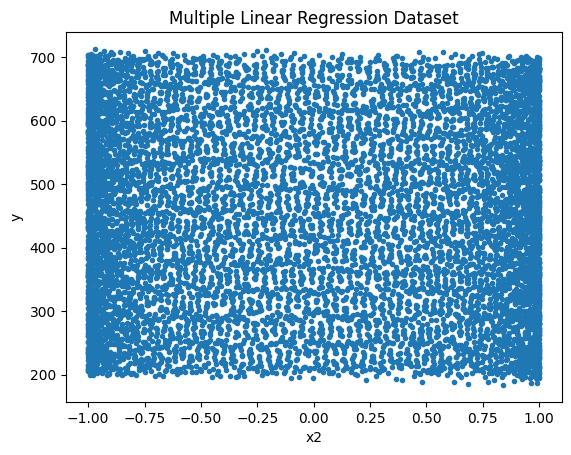

In [53]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [89]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

In [92]:
for col in train_x.columns:
    train_x[col] = min_max_scaler(train_x[col])

# 3. Prediction

In [106]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 2, 2, 1], task='regression', learning_rate=1e-5, n_epochs=250, print_cost=True)

Cost after iteration 0: 2.8943213063076607
Cost after iteration 249: 2.848883725463897


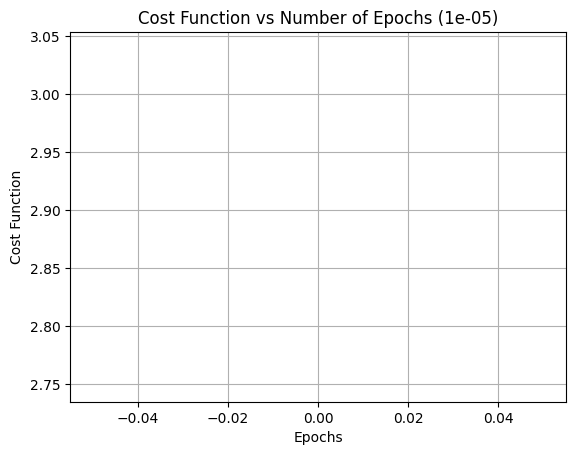

In [107]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=True)

In [108]:
pred_train = model.predict(train_x, train_y)

RMSE: 2.847700214078846


# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [3]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [90]:
n_epochs = 100

In [91]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 1,1], task='regression', learning_rate=5e-5, n_epochs=n_epochs, print_cost=True)

In [92]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, plot_cost_function=False)

Cost after iteration 0: 0.00989392544263765
Cost after iteration 99: 0.009854033581657063


In [93]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.009853631570551462


In [94]:
pred = model.predict(test_x, test_y)

RMSE: 0.014082995943724898


<Axes: >

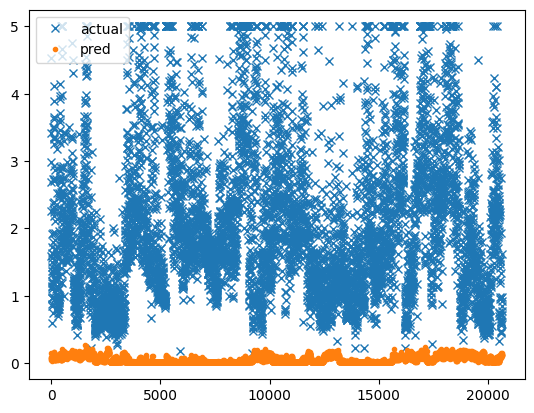

In [96]:
result_df = pd.DataFrame(data={'actual':test_y[test_y.columns[0]], 'pred': pred[0]})
result_df.plot(kind='line', style=['x', '.'])